## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how="outer")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df["Duplicate?"] = df.duplicated(subset=['Mouse ID', 'Timepoint'])
df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_df = df.loc[(df['Duplicate?'] == True)]
Duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanDF = df.loc[(df['Duplicate?'] == False)]

In [7]:
# Checking the number of mice in the clean DataFrame.
CleanDF["Mouse ID"].nunique() 

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Group by Drug Regimen
grouped_df = CleanDF.groupby("Drug Regimen")

# Mean
TumorMean = grouped_df["Tumor Volume (mm3)"].mean()
# Median
TumorMedian = grouped_df["Tumor Volume (mm3)"].median()
# Variance
TumorVar = grouped_df["Tumor Volume (mm3)"].var()
# Standard deviation
TumorSTD = grouped_df["Tumor Volume (mm3)"].std()
# SEM
TumorSEM = grouped_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
TumorSummary5 = pd.merge(TumorMean, TumorMedian, on="Drug Regimen")
TumorSummary5 = TumorSummary5.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
TumorSummary4 = pd.merge(TumorSummary5, TumorVar, on="Drug Regimen")
TumorSummary4 = TumorSummary4.rename(columns = {"Tumor Volume (mm3)": "Variance"})
TumorSummary3 = pd.merge(TumorSummary4, TumorSTD, on="Drug Regimen")
TumorSummary3 = TumorSummary3.rename(columns = {"Tumor Volume (mm3)": "STD"})
TumorSummary2 = pd.merge(TumorSummary3, TumorSEM, on="Drug Regimen")
TumorSummary2 = TumorSummary2.rename(columns = {"Tumor Volume (mm3)": "SEM"})

TumorSummary2

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
TumorSummary = grouped_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
TumorSummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements Taken by Drug'}, xlabel='Drug Regimen', ylabel='# of Measurements'>

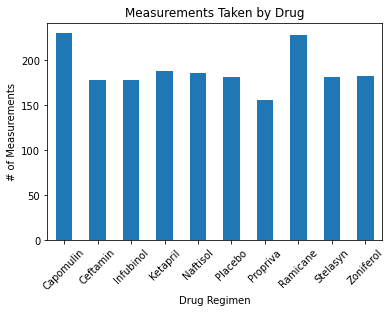

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
BarChart_df = CleanDF.groupby(['Drug Regimen']).size()
BarChart_pa = BarChart_df.plot.bar(rot=45)
plt.title("Measurements Taken by Drug")
plt.ylabel("# of Measurements")
BarChart_pa

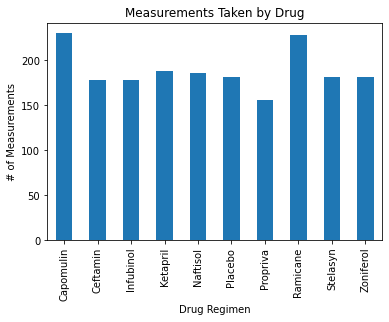

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
BarChart = CleanDF.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar')
plt.title("Measurements Taken by Drug")
plt.ylabel("# of Measurements")
plt.show()


<AxesSubplot:title={'center':'Sex by Panda'}>

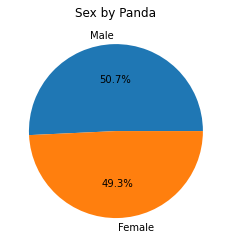

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Data by sex
data = CleanDF['Sex'].value_counts()

# Pie chart using Pandas
pie_chart = data.plot.pie(autopct="%1.1f%%", title='Sex by Panda')

# Hide y label
pie_chart.set_ylabel('')

# Print chart
pie_chart


<function matplotlib.pyplot.show(close=None, block=None)>

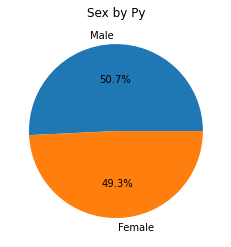

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Data by sex
data = CleanDF['Sex'].value_counts()
#Pie plot by Py
plt.pie(data, labels=data.index.values, autopct="%1.1f%%")
plt.title('Sex by Py')
plt.show


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MaxTimepoint_df = pd.DataFrame(CleanDF.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MaxTP_df = pd.merge(CleanDF, MaxTimepoint_df, on='Mouse ID')
MaxTP_df.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1883     z969     Naftisol  Male           9          30         25   
1884     z969     Naftisol  Male           9          30         30   
1885     z969     Naftisol  Male           9          30         35   
1886     z969     Naftisol  Male           9          30         40   
1887     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Duplicate?  Max Timepoint  
0              45.000000                 0   

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    # Dataframe of matching drugs in Drug Regimen via loc
    drug_df = MaxTP_df.loc[MaxTP_df['Drug Regimen'] == drug]
    # Dataframe adding max timepoint lines via loc
    TPdrug_df = drug_df.loc[MaxTP_df['Timepoint'] == MaxTP_df['Max Timepoint']]
    # Series of Tumor values from dataframe
    values = TPdrug_df['Tumor Volume (mm3)']
    
     # add subset 
    drug_values.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerquart = quartiles[.25]
    upperquart = quartiles[.75]
    iqr = upperquart-lowerquart
    print(f'IQR for {drug}: {iqr}')
    
    # Determine upper and lower bounds
    lower_bound = lowerquart - (1.5*iqr)
    upper_bound = upperquart + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
          
    # Determine outliers
    outlier_count = (values.loc[(TPdrug_df['Tumor Volume (mm3)'] >= upper_bound) | 
                  
                                (TPdrug_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {drug} outliers: {outlier_count}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


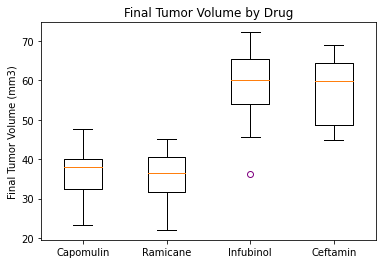

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values, flierprops=dict(markeredgecolor='purple'))

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

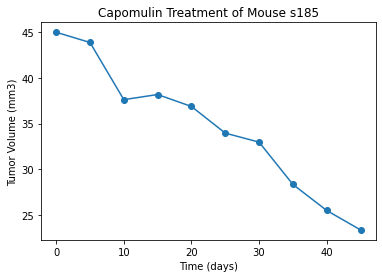

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Pick a mouse to base data on
mouse = CleanDF.loc[CleanDF['Mouse ID'] == 's185']
# Line plot for tumor volume vs time point
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Show plot
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

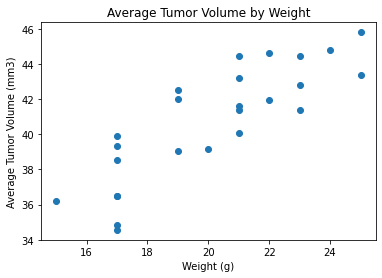

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe of just Capomulin
CapomulinDF = CleanDF.loc[CleanDF['Drug Regimen'] == 'Capomulin']

# Find avg tumor volume of each mouse
AvgVolDF = pd.DataFrame(CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Vol'})

# Merge together and drop duplicates
AvgVolDF = pd.merge(CapomulinDF, AvgVolDF, on='Mouse ID')
UniqueAvgVolDF = AvgVolDF[['Weight (g)', 'Avg Tumor Vol']].drop_duplicates()

# Create X and Y axis and make scatter plot
x_axis = UniqueAvgVolDF['Weight (g)']
y_axis = UniqueAvgVolDF['Avg Tumor Vol']
plt.scatter(x_axis, y_axis)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

# Show plot
plt.show

## Correlation and Regression

The correlation between Weight (g) and Average Tumor Volume for Capomulin is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

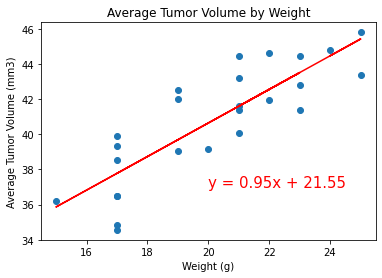

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Pearson R
r = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Weight (g) and Average Tumor Volume for Capomulin is {round(r[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

# Show plot
plt.show

# Analysis
Below are 3 conclusions I came to from the data presented:
- There is a strong correlation between the weight of a mouse and the average tumor volume. This might tell us less about the individual treatments and more about the function of the how the tumor works.
- Of the 4 drug regimens that we selected for the box plot, we can start to conclude that Capomulin may be the most effective regimen for treating this tumor based on not only having the smallest tumor values at the end but a smaller iqr at the end of the study. 
- Based off the bar chart counting the amount of data for each Drug Regimen, we can conclude that the study was generally equally conducted across drug regimens. 